In [4]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

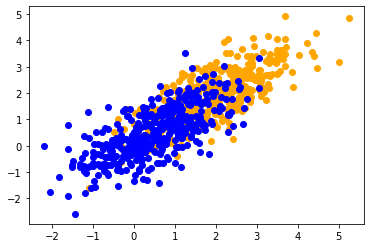

In [2]:
#Reading and visualization
file = pd.read_csv("~/Downloads/train2.csv")
file = file.to_numpy()

def print_scatter(file):
    positive_mask = file[:, -1] == 1
    negative_mask = file[:, -1] == 0
    positives = file[positive_mask, :]
    negatives = file[negative_mask, :]
    plt.scatter(positives[:, 0], positives[:, 1], color='orange')
    plt.scatter(negatives[:, 0], negatives[:, 1], color="blue")
    
print_scatter(file)

In [3]:
dimensions = np.shape(file)[1] - 1
n = np.shape(file)[0]
X = file[:, 0:-1]
Y = file[:, [-1]]

# Some formatting and parameters initialization
t = np.transpose(np.random.rand(1, dimensions + 1))

# Adjust the dimensions of X
ones = np.ones((n, 1))
X = np.hstack((ones, X))

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

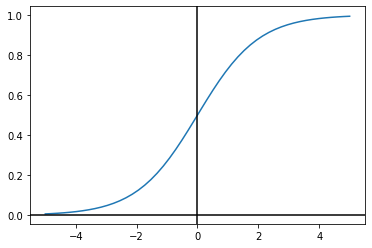

In [10]:
x_demo = np.linspace(-5, 5)
y_demo = sigmoid(x_demo)
plt.plot(x_demo, y_demo)
plt.axvline(color='black')
plt.axhline(color='black')
plt.show()

In [5]:
def costFunction(X, thetas, Y):
    return np.sum(np.matmul(X, thetas) - Y)

In [6]:
# The gradient descent function for logistic regression
# Remember, as you can see the pattern here, this function can be generalized to take a prediction function!
# Thank you SICP
def gradient_descent(X, Y, theta, learning_rate, num_iters):
    # normalizing the input :( otherwise it leads to overflow
    x_calc = X / X.max(axis=0)
    n = np.shape(x_calc)[0]
    for i in range(num_iters):
        prediction = sigmoid(np.matmul(X, theta))
        error = Y - prediction
        theta += learning_rate * (error) * 

        print(i)
        for j in range(n):
            example = np.array([x_calc[j]])
            prediction = np.apply_along_axis(sigmoid, 0, np.matmul(example, theta)) #log to prevent overflow
            error = Y[j] - prediction
            theta += learning_rate * (error) * (np.transpose(example))
    return theta

In [7]:
# The prediction function. It predicts Y from respective X and thetas
def predict(X, thetas):
    """X is a nxd dimensional array and theta is a dx1 dimensional"""
    ones = np.ones((np.shape(X)[0], 1))
    x_calc = X # / X.max(axis=0)
    prediction = np.apply_along_axis(sigmoid, 0, np.matmul(np.hstack((ones, x_calc)), thetas))
    return np.where(prediction >= 0, 1, 0)

In [8]:
thetas = gradient_descent(X, Y, t, 0.1, 3000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154


KeyboardInterrupt: 

In [107]:
print(thetas)

[[-25.26977057]
 [ 20.66892936]
 [ 20.21752724]]


In [110]:
def plotDecisionBoundary(thetas):
    theta_dim = np.shape(thetas)[0]
    x_coeffs = thetas[:theta_dim-1]
    y_coeff = thetas[theta_dim-1][0]
    rows_xs = np.arange(0, 1, 0.01)
    n = np.size(rows_xs)
    xs = np.linspace(rows_xs, rows_xs, 1)
    xs = np.transpose(xs)
    
    for i in range(2, theta_dim-1):
        xs = np.append(xs, xs[:, 0] ** i, axis=1)
    
    ones = np.ones((n, 1))
    xs = np.hstack((ones, xs))
    ys = (np.matmul(xs, x_coeffs))/(-y_coeff)
    
    plt.plot(xs[:, 1], ys, color='green')
    print_scatter(file / file.max(axis=0))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gradient Descent Prediction")
    plt.show()

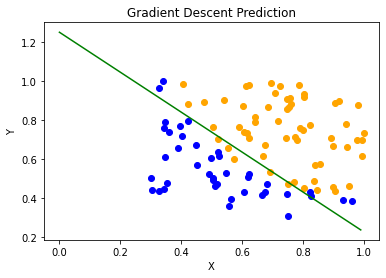

In [111]:
plotDecisionBoundary(thetas)

The original data also had to be normalized for the plot of separation line